In [1]:
import nltk
from nltk.corpus import brown
categories = brown.categories()
sentences = [len(brown.sents(categories=cat)) for cat in categories]

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from pprint import pprint
pprint(dict(zip(categories, sentences)))

{'adventure': 4637,
 'belles_lettres': 7209,
 'editorial': 2997,
 'fiction': 4249,
 'government': 3032,
 'hobbies': 4193,
 'humor': 1053,
 'learned': 7734,
 'lore': 4881,
 'mystery': 3886,
 'news': 4623,
 'religion': 1716,
 'reviews': 1751,
 'romance': 4431,
 'science_fiction': 948}


In [3]:
print(sum(sentences))

57340


In [4]:
by_sentences = brown.sents()
len(by_sentences)

57340

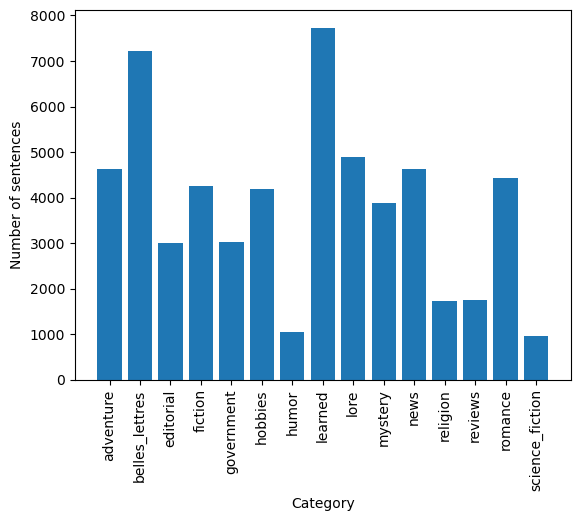

In [5]:
import matplotlib.pyplot as plt
plt.bar(categories, sentences)
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Number of sentences')
plt.show()


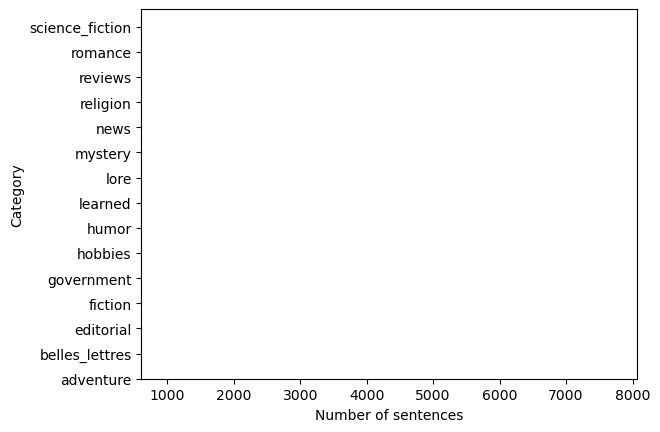

In [10]:
import matplotlib.pyplot as plt
plt.bar(sentences, categories)
# plt.xticks(rotation=90)
plt.ylabel('Category')
plt.xlabel('Number of sentences')
plt.show()


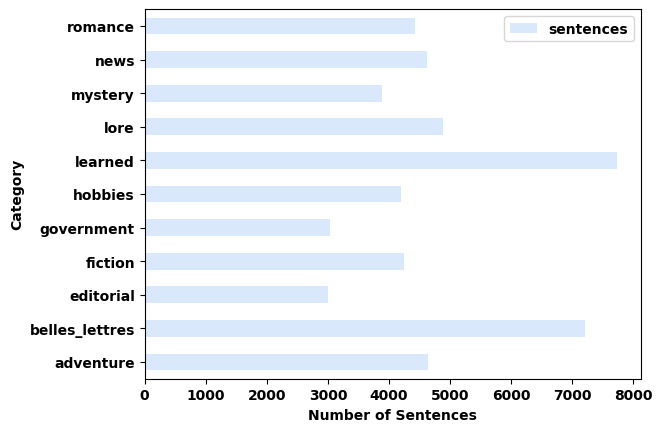

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a sample dataframe
data = {'categories': categories, 'sentences': sentences}

# Convert the dictionary to a pandas dataframe
df = pd.DataFrame(data)

df = df[df['sentences'] >= 2000]

plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.weight'] = 'bold'

# Set the color of the bars to #DAE8FC
color = '#DAE8FC'

# Plot the horizontal bar chart
ax = df.plot.barh(x='categories', y='sentences', color=color)

# Set the x-label and y-label
ax.set_xlabel('Number of Sentences', fontweight='bold')
ax.set_ylabel('Category', fontweight='bold')

plt.savefig('histogram.png', transparent=True, bbox_inches='tight')

# Show the plot
plt.show()


In [11]:
categories

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [14]:
!pip install gdown

In [15]:
import gdown
url = "https://drive.google.com/file/d/1lMXC-H60waEU9z9XlfOZeui9EmvMKvZR/view?usp=sharing"
output = "metadata.json"
gdown.download(url, output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1lMXC-H60waEU9z9XlfOZeui9EmvMKvZR
To: /kaggle/working/metadata.json
100%|██████████| 10.9M/10.9M [00:00<00:00, 40.5MB/s]


'metadata.json'

In [18]:
import json
with open('metadata.json', 'r') as f:
    metadata_brown = json.load(f)

In [23]:
selected_sentences = []
for value in metadata_brown.values():
    selected_sentences.append(value['text'])
len(selected_sentences)

54785

In [24]:
selected_sentences[0]

"The Fulton County Grand Jury said Friday an investigation of Atlanta's recent primary election produced `` no evidence '' that any irregularities took place."

In [26]:
from tqdm import tqdm

In [30]:
dict(zip(categories, sentences))

{'adventure': 4637,
 'belles_lettres': 7209,
 'editorial': 2997,
 'fiction': 4249,
 'government': 3032,
 'hobbies': 4193,
 'humor': 1053,
 'learned': 7734,
 'lore': 4881,
 'mystery': 3886,
 'news': 4623,
 'religion': 1716,
 'reviews': 1751,
 'romance': 4431,
 'science_fiction': 948}

In [52]:
sentences_with_categories = dict(zip(categories, sentences))
for cat in brown.categories():
    for sent in tqdm(brown.sents(categories=cat)):
        ss = ' '.join(sent[:-1])
        ss2 = ss + '.'
#         print(ss)
        if (ss not in selected_sentences) and (ss2 not in selected_sentences):
            sentences_with_categories[cat] -= 1
#             print('no')
#         else:
#             print('yes')

100%|██████████| 948/948 [00:02<00:00, 423.77it/s]


In [42]:
'He did not trust Rankin , his violent temper , his killer instinct.' in selected_sentences

True

In [38]:
s = 'Dan Morgan told himself he would forget Ann Turner.'
s.split()

['Dan', 'Morgan', 'told', 'himself', 'he', 'would', 'forget', 'Ann', 'Turner.']

In [ ]:
a

In [53]:
sentences_with_categories

{'adventure': 4028,
 'belles_lettres': 5970,
 'editorial': 2384,
 'fiction': 3557,
 'government': 2259,
 'hobbies': 3343,
 'humor': 837,
 'learned': 6371,
 'lore': 4160,
 'mystery': 3297,
 'news': 3893,
 'religion': 1291,
 'reviews': 1308,
 'romance': 3653,
 'science_fiction': 778}

In [54]:
sum(sentences_with_categories.values())

47129

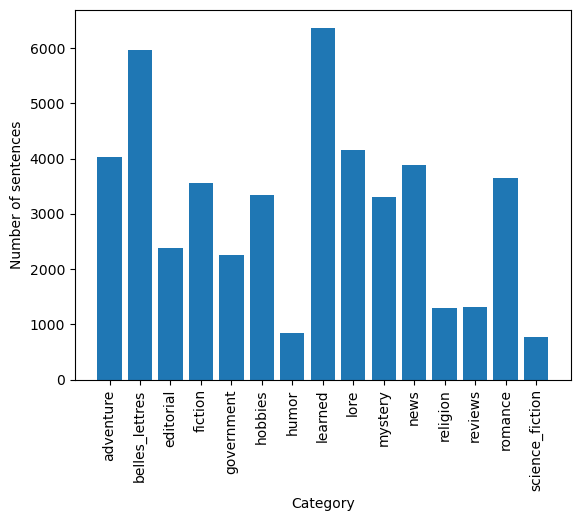

In [55]:
import matplotlib.pyplot as plt
plt.bar(sentences_with_categories.keys(), sentences_with_categories.values())
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Number of sentences')
plt.show()

In [50]:
old_sentences_with_categories = dict(zip(categories, sentences))

In [51]:
for cat in sentences_with_categories:
    print(cat, old_sentences_with_categories[cat] - sentences_with_categories[cat])

adventure 609
belles_lettres 1240
editorial 614
fiction 692
government 776
hobbies 862
humor 216
learned 1379
lore 722
mystery 589
news 736
religion 427
reviews 443
romance 779
science_fiction 170


In [29]:
category_count = {}
categorical_sentences = {cat: brown.sents(categories=cat) for cat in categories}
for sentence in tqdm(selected_sentences):
    for cat, category_sentences in categorical_sentences.items():
        if sentence in category_sentences:
            category_count[category] = category_count.get(category, 0) + 1
            break

# Print the category and count for each sentence
print(category_count)

  4%|▍         | 2363/54785 [2:22:18<52:37:13,  3.61s/it]


KeyboardInterrupt: 

In [ ]:
# Plot a histogram of the category and count
plt.bar(category_count.keys(), category_count.values())
plt.xlabel('Category')
plt.ylabel('Number of sentences')
plt.show()